In [9]:
import random

def stick(number_goats=2):
    """A function to simulate a play of the game when we stick"""
    doors = ['Car'] + number_goats * ['Goat']
        
    initial_choice = random.choice(doors)  # make a choice
    return initial_choice == 'Car'

def switch(number_goats=2):
    """A function to simulate a play of the game when we swap"""
    doors = ['Car'] + number_goats * ['Goat']  
    
    initial_choice = random.choice(doors)  # make a choice
    
    doors.remove(initial_choice)  # Switching: remove initial choice
    doors.remove('Goat')  # The game show host shows us a goat
    
    new_choice = random.choice(doors)   # We choose our one remaining option
            
    return new_choice == 'Car'

Checking the initial probabilities:

In [10]:
repetitions = 10000
random.seed(0)
prob_win_stick = sum([stick() for rep in range(repetitions)]) / repetitions
prob_win_switch = sum([switch() for rep in range(repetitions)]) / repetitions
prob_win_stick, prob_win_switch

(0.3346, 0.6636)

Verifying the mathematical formula:

In [11]:
import sympy as sym
n = sym.symbols('n')
p_n = (1 - 1 / (n + 1)) * (1 / (n - 1))
p_n.simplify()

n/(n**2 - 1)

In [12]:
(p_n / (1 / (n + 1))).simplify() 

n/(n - 1)

A function for the ratio:

In [13]:
def ratio(repetitions=50000, number_goats=2):
    """Obtain the ratio of win probabilities"""
    prob_win_stick = sum([stick(number_goats=number_goats) 
                          for rep in range(repetitions)]) / repetitions
    prob_win_switch = sum([switch(number_goats=number_goats) 
                           for rep in range(repetitions)]) / repetitions
    return prob_win_switch / prob_win_stick 

Draw the plot:

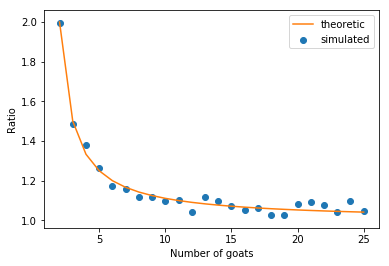

In [14]:
import matplotlib.pyplot as plt
random.seed(0)
goats = range(2, 25 + 1)
ratios = [ratio(number_goats=n) for n in goats]
theoretic_ratio = [(n / (n - 1)) for n in goats]

plt.figure()
plt.scatter(goats, ratios, label="simulated")
plt.plot(goats, theoretic_ratio, color="C1", label="theoretic")
plt.xlabel("Number of goats")
plt.ylabel("Ratio")
plt.legend()
plt.savefig("/home/vince/Desktop/simulated_v_expected_ratio_of_win_probability.svg");

In [15]:
sym.limit((p_n / (1 / (n + 1))), n, sym.oo)

1